In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = mpimg.imread('car.jpg')
print('Image dimensions:', img.shape)

Image dimensions: (1000, 1000, 3)


$$
G = 0.3r + 0.59g + 0.11b
$$

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3, 0.59, 0.11])

gray = rgb2gray(img)

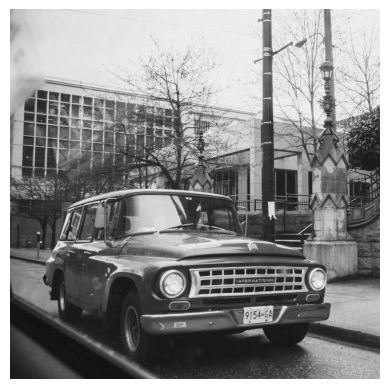

In [9]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [6]:
gray.shape

(1024, 1024)

In [5]:
def nablaG(G,x,y,h=1):
    delx = (G[x+h,y]-G[x-h,y])/(2*h)
    dely = (G[x,y+h]-G[x,y-h])/(2*h)
    return (delx, dely)

In [80]:
def gradient(img):
    n = img.shape
    grad = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            g = nablaG(img, x, y)
            grad[x, y] = np.sqrt(g[0]**2+g[1]**2)
            # grad[x, y] = abs(np.degrees(np.arctan2(g[1], g[0])))
    return grad
# gradG = gradient(gray)

(-0.5, 999.5, 999.5, -0.5)

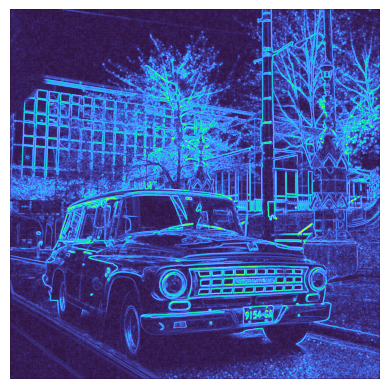

In [14]:
plt.imshow(gradG, cmap=plt.get_cmap('turbo'))
plt.axis('off')


In [18]:
gradG

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.58113883,  1.42900315, ...,  1.58113883,
         2.91547595,  0.        ],
       [ 0.        ,  1.24940986,  0.73624045, ...,  3.        ,
         2.23606798,  0.        ],
       ...,
       [ 0.        ,  4.71699057,  4.05166941, ...,  7.09067169,
         4.98508024,  0.        ],
       [ 0.        ,  2.23606798,  4.64338508, ..., 15.6596879 ,
         9.50180115,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

(-0.5, 999.5, 999.5, -0.5)

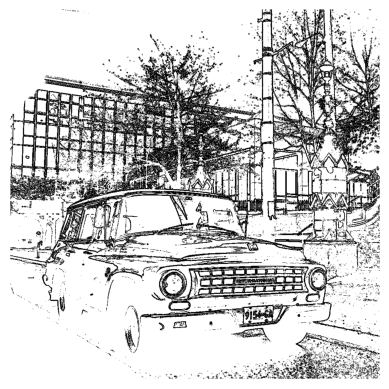

In [32]:
mask = np.where(gradG > 15, 0, 1)
plt.imshow(mask, cmap=plt.get_cmap('gray'))
plt.axis('off')


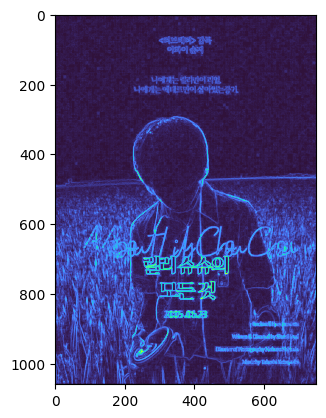

In [11]:
def detect_edges(file):
    img = mpimg.imread(file)
    gray = rgb2gray(img)
    gradG = gradient(gray)
    plt.imshow(gradG, cmap=plt.get_cmap('turbo'))
    return gradG
grad1 = detect_edges('lily.jpg')

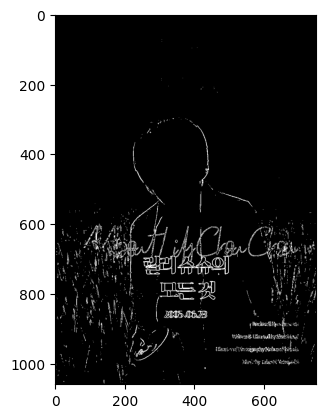

In [20]:
mask1 = np.where(grad1 > 30, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))

(-0.5, 748.5, 1059.5, -0.5)

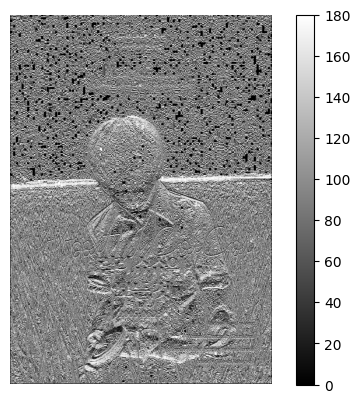

In [78]:
grad2 = detect_edges('lily.jpg')
plt.colorbar()
plt.axis('off')

(-0.5, 748.5, 1059.5, -0.5)

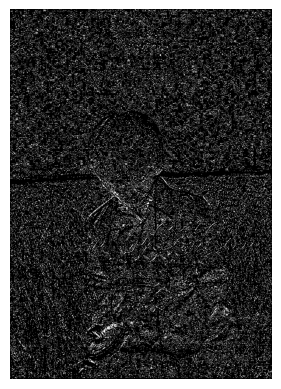

In [79]:
t = 15
mask1 = np.where((grad2 > 45-t) & (grad2 < 45+t), 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

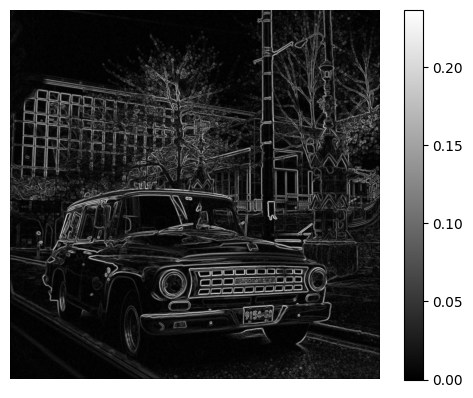

In [99]:
grad2 = detect_edges('cara.png')
plt.colorbar()
plt.axis('off')

In [101]:
np.max(grad2)/4

0.05919951951364513

(-0.5, 999.5, 999.5, -0.5)

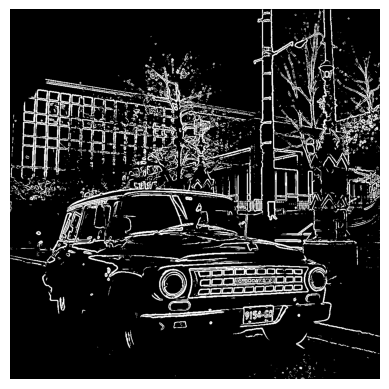

In [107]:
# t = 15
# mask1 = np.where((grad2 > 45-t) & (grad2 < 45+t), 1, 0)
mask1 = np.where(grad2 > 0.06, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')

(-0.5, 704.5, 470.5, -0.5)

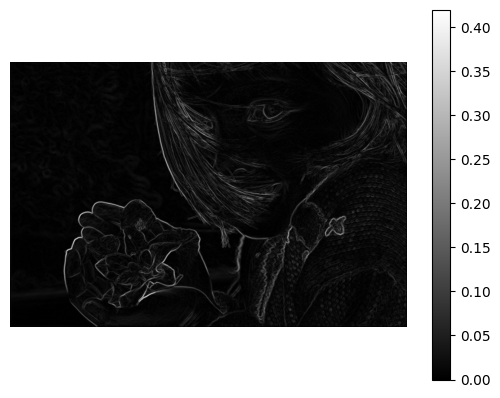

In [90]:
grad1 = detect_edges('kid.png')
plt.colorbar()
plt.axis('off')

(-0.5, 704.5, 470.5, -0.5)

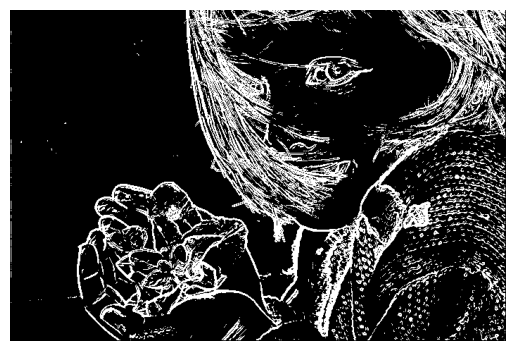

In [95]:
mask1 = np.where(grad1 > 0.03, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')

(-0.5, 704.5, 470.5, -0.5)

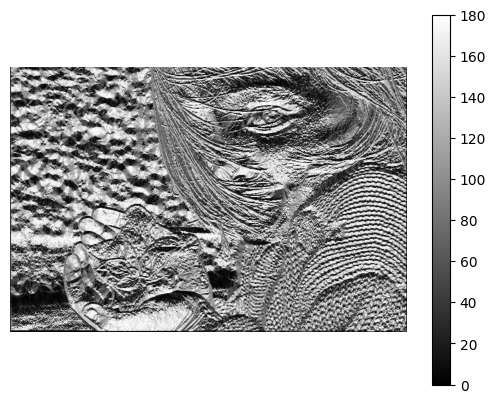

In [53]:
def detect_edges(file):
    img = mpimg.imread(file)
    gray = rgb2gray(img)
    gradG = gradient(gray)
    plt.imshow(gradG, cmap=plt.get_cmap('gray'))
    return gradG
grad1 = detect_edges('kid.png')
plt.colorbar()
plt.axis('off')

(-0.5, 704.5, 470.5, -0.5)

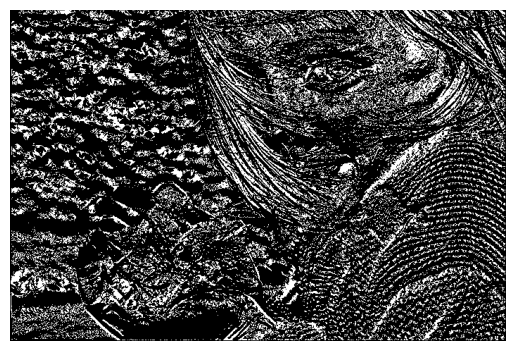

In [71]:
t = 20
mask1 = np.where((grad1 > 45-t) & (grad1 < 45+t), 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')